In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [5]:
df_diabetes = pd.read_csv('diabetes - Copy.csv')

df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_diabetes.shape

(768, 9)

In [7]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# let us make a copy of the DataFrame and use code to bring out Insulin >0
# Discovered that Insulin can not be zero in anyody, so we are creating a new dataframe from our DataFrame

diabetes = df_diabetes.copy()

diabetes = diabetes[diabetes['Insulin'] >0]

diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [11]:
diabetes.shape

(394, 9)

In [12]:
# This .replace will take care of zero value in our DataFrame

diabetes['BMI'] = diabetes['BMI'].replace(to_replace= [0], 
                    value =np.median(diabetes['BMI']))

diabetes['BMI'] = diabetes['BMI'].replace(to_replace= [0], 
                    value =np.median(diabetes['BMI']))

In [36]:
# ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
# for columm, suplot in zip(diabetes, ax.flatten()):
    # sns.histplot(x = diabetes[column], kde=True, ax=subplots)
    
# fig.subtitle('Distribution of all Features')
#plt.show()


In [13]:
# split the data into dependent and independent vriables
# X is our independent variables we have taken 'Outcome' out completely

X = diabetes.drop(['Outcome'], axis=1)

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [14]:
y = diabetes['Outcome']


In [15]:
# Data preprocessing for independent varibles X
# Anytme you are dealing with independent variables with different units and amount you have to scale them

scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

array([[-0.71338621, -0.10538584,  1.39273013, ...,  1.74521606,
        -0.05302855, -0.47267928],
       [-0.4014282 ,  0.75566988, -0.05257892, ..., -0.72406089,
        -0.53918407, -0.17815798],
       [-0.4014282 , -1.31724203,  0.10801097, ..., -0.42432207,
         0.06136098, -0.57085305],
       ...,
       [ 0.22248782, -0.9983325 , -0.05257892, ...,  0.00387625,
        -0.22747259, -0.86537435],
       [ 0.22248782,  0.69188797, -1.01611829, ..., -0.50996173,
        -0.68217098,  0.60723216],
       [-0.71338621, -0.87076869,  0.26860086, ..., -1.02379971,
         0.42168801,  0.50905839]])

In [17]:
# Build model

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_predict = logreg.predict(X_test)


In [18]:
confusion = confusion_matrix(y_test, logreg_predict)
confusion

array([[52,  3],
       [ 8, 16]], dtype=int64)

In [19]:
# Use score method to get accuracy of model

score = logreg.score(X_test, y_test)
print(score * 100)

86.07594936708861


Text(0.5, 1.0, 'Accuracy Score: 0.8607594936708861')

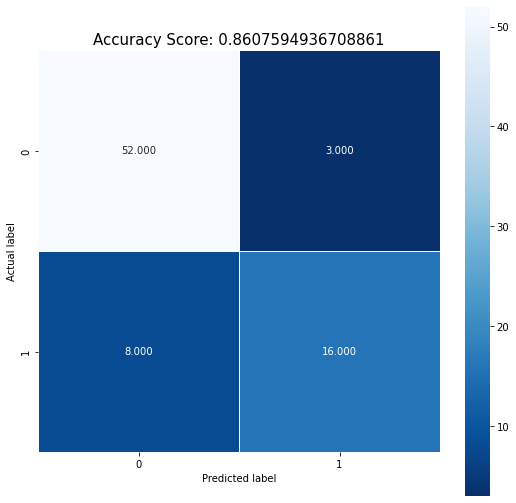

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)